# **CLASIFICACIÓN DE ENFERMEDAD CARDÍACA CON TÉCNICAS DE MACHINE LEARNING**

---


JACKELINE ROMERO

ANDRÉS CERVERA

PABLO IVORRA

ALBERTO -



In [1]:
# imports
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

In [2]:
ruta = "/content/train.csv"
df = pd.read_csv(ruta)

In [3]:
print(df.shape)
df.head()

(732, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51.0,1.0,1.0,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0
1,54.0,1.0,3.0,120.0,237.0,0.0,0.0,150.0,1.0,1.5,-9.0,-9.0,7.0,2
2,63.0,1.0,4.0,140,0,?,2.0,149,0,2,1,?,?,2
3,52.0,0.0,2.0,140.0,-9.0,0.0,0.0,140.0,0.0,0.0,-9.0,-9.0,-9.0,0
4,55.0,1.0,4.0,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3


## **DESCRIPCIÓN DE LA BASE DE DATOS**


*   AGE: edad del paciente
*   SEX: Sexo del paciente
      * 0: Mujer
      * 1: Hombre

*   CP: Tipo de dolor en el pecho
      * Tipo 1: Angina típica
      * Tipo 2: Angina Atípica
      * Tipo 3: Dolor no anginal
      * Tipo 4: Asintomático

*   TRESTBPS: Presión arterial en reposo en mm Hg al ingreso al hospital
*   CHOL: Colesterol sérico en mg /dl

*   FBS: dolor provocado por el esfuerzo
*   RESTECG: Resultados electrocardiográficos en reposo
      * 0: Normal
      * 1: Tener anormalidad de onda ST-T (inversiones de onda T y / o elevación o Depresión de ST de > 005 mV)
      * 2: Muestra hipertropía ventricular izquierda probable.

*   THALACH: Frecuencia cardiaca en reposo
*   EXANG: Angina inducida por el ejercicio
*   OLDPEAK: Depresión del ST inducida por el ejercicio en relación con el descanso

*   SLOPE: La pendiente del segmento ST de ejercicio pico
      * 1: ascenso
      * 2: plano
      * 3: descenso
*   CA: Numero de vasos principales (0-3) coloreados por fluoroscopia

*   THAL: El estado del corazón según la prueba de Thallium
      * 3: normal
      * 6: defecto fijo
      * 7: defecto reversible

*   LABEL: Presencia de enfermedad cardíaca (estado de enfermedad angiográfica)
      * 0: Saludable
      * 1: diagnosticado como etapa 1
      * 2: Diagnosticado como etapa 2
      * 3: Diagnosticado como etapa 3
      * 4: diagnosticado como etapa 4









A continuación, observaremos todas las variables, su tipología y la existencia de registros nulos.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       732 non-null    float64
 1   sex       732 non-null    float64
 2   cp        732 non-null    float64
 3   trestbps  732 non-null    object 
 4   chol      732 non-null    object 
 5   fbs       732 non-null    object 
 6   restecg   732 non-null    float64
 7   thalach   732 non-null    object 
 8   exang     732 non-null    object 
 9   oldpeak   732 non-null    object 
 10  slope     732 non-null    object 
 11  ca        732 non-null    object 
 12  thal      732 non-null    object 
 13  label     732 non-null    int64  
dtypes: float64(4), int64(1), object(9)
memory usage: 80.2+ KB


# **1. ANÁLISIS Y LIMPIEZA DEL DATASET DE ENTRENAMIENTO**

## REGISTROS INCOMPLETOS

En primer lugar, estudiaremos la existencia de registros incompletos en nuestro dataset.

In [5]:
# Ver valores nulos en el DataFrame
valores_nulos = df.isnull().sum()

# Imprimir el número de valores nulos en cada columna
print(valores_nulos)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
label       0
dtype: int64


Podemos ver que no existen registros vacíos en el dataset de entrenamiento, por lo que continuaremos analizando cada una de las variables.


## ANÁLISIS DE VARIABLES

In [6]:
df.describe()

,age,sex,cp,restecg,label
count,732.000000,732.000000,732.000000,732.000000,732.000000
mean,53.364754,0.789617,3.250000,0.602459,1.132514
std,9.306868,0.407859,0.923363,0.802966,1.257615
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,0.000000,0.000000
50%,54.000000,1.000000,4.000000,0.000000,1.000000
75%,60.000000,1.000000,4.000000,1.000000,2.000000
max,76.000000,1.000000,4.000000,2.000000,4.000000


### EDAD

---



In [7]:
# Obtener la distribución de valores de la variable "age" y ordenar por edad ascendente
reparto_age = df['age'].value_counts().sort_index()

# Imprimir el reparto de valores ordenado por edad ascendente
print(reparto_age)


age
28.0     1
29.0     2
30.0     1
31.0     2
32.0     3
33.0     1
34.0     5
35.0     8
36.0     6
37.0    10
38.0    12
39.0    13
40.0     7
41.0    24
42.0    15
43.0    19
44.0    15
45.0    14
46.0    20
47.0    13
48.0    23
49.0    22
50.0    21
51.0    27
52.0    29
53.0    27
54.0    38
55.0    29
56.0    34
57.0    33
58.0    36
59.0    29
60.0    24
61.0    25
62.0    26
63.0    24
64.0    17
65.0    14
66.0    12
67.0     9
68.0     9
69.0    12
70.0     5
71.0     4
72.0     2
73.0     1
74.0     4
75.0     3
76.0     2
Name: count, dtype: int64


Procederemos a cambiar la edad a número entero.

In [8]:
# Convertir los valores de la columna 'age' a enteros en el DataFrame df
df['age'] = df['age'].astype(int)

# Obtener la distribución de valores y ordenarla por edad ascendente
reparto_age = df['age'].value_counts().sort_index()

# Imprimir el reparto de valores ordenado por edad ascendente
print(reparto_age)


age
28     1
29     2
30     1
31     2
32     3
33     1
34     5
35     8
36     6
37    10
38    12
39    13
40     7
41    24
42    15
43    19
44    15
45    14
46    20
47    13
48    23
49    22
50    21
51    27
52    29
53    27
54    38
55    29
56    34
57    33
58    36
59    29
60    24
61    25
62    26
63    24
64    17
65    14
66    12
67     9
68     9
69    12
70     5
71     4
72     2
73     1
74     4
75     3
76     2
Name: count, dtype: int64


In [9]:
import numpy as np

# Calcular la mediana usando numpy
mediana = np.median(df['age'])
print("La mediana es:", mediana)

La mediana es: 54.0


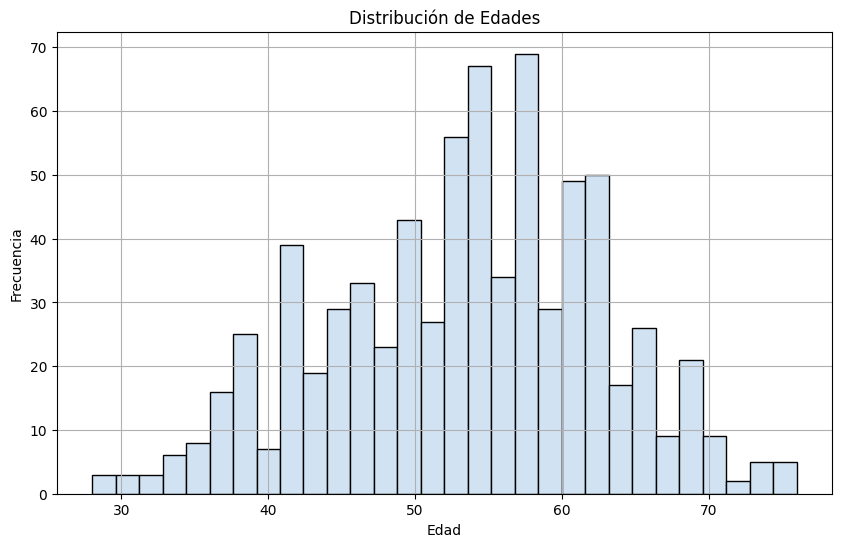

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

custom_palette = sns.color_palette("Blues", 30)

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=30, color=custom_palette[5], edgecolor='black') # Puedes ajustar el número de bins según lo necesites
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

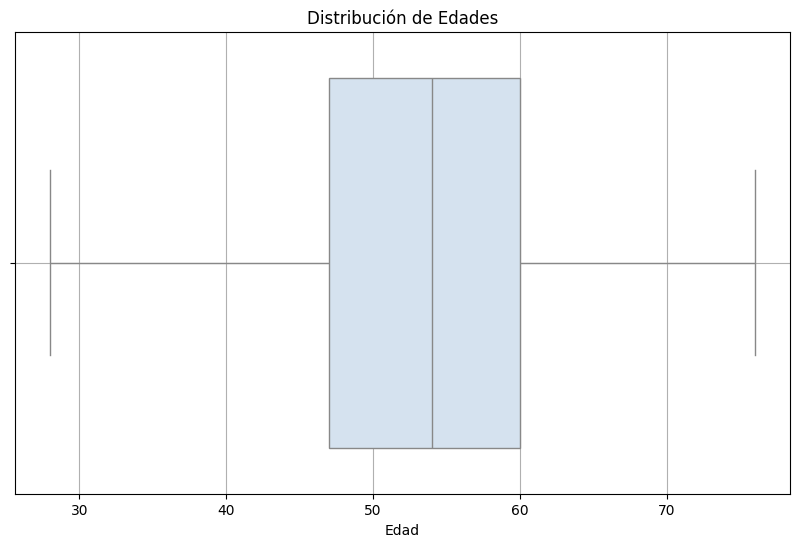

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['age'], color=custom_palette[5])  # Utiliza el mismo color que el histograma
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.grid(True)
plt.show()

Podemos observar que el mínimo de edad es de 28 años, mientras que el máximo es de 76 años. La media de edad es de 53,36 años y la mediana de 54 años. También podemos observar que las edades están concentradas entre los 50 y 60 años.

### SEXO

---

In [12]:
# Obtener la distribución de valores de la variable "sex" y ordenar por edad ascendente
reparto_sex = df['sex'].value_counts().sort_index()

# Imprimir el reparto de valores ordenado por edad ascendente
print(reparto_sex)

sex
0.0    154
1.0    578
Name: count, dtype: int64


En la variable "Sexo" descartaremos también los decimales y los convertiremos en número de entero. Tendríamos 154 mujeres y 578 hombres en nuestra muestra.

In [13]:
# Convertir los valores de la columna 'sex' a enteros en el DataFrame df
df['sex'] = df['sex'].astype(int)

# Obtener la distribución de valores y ordenarla por sexo ascendente
reparto_sex = df['sex'].value_counts().sort_index()

# Imprimir el reparto de valores ordenado por sexo ascendente
print(reparto_sex)


sex
0    154
1    578
Name: count, dtype: int64


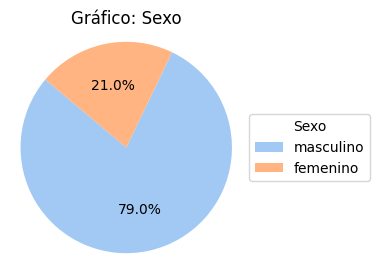

In [14]:
df['sex'] = df['sex'].astype(str)

df['sex'] = df['sex'].replace({'0': 'femenino', '1': 'masculino'})

conteo_sex = df['sex'].value_counts()

paleta_sexo_pastel = sns.color_palette("pastel", 2)

# Calcular los porcentajes
porcentajes = 100 * conteo_sex / len(df)

# Crear el gráfico de quesos
plt.figure(figsize=(3, 3))
pie = plt.pie(porcentajes, labels=['', ''], autopct='%1.1f%%', startangle=140, colors=paleta_sexo_pastel)

plt.title('Gráfico: Sexo')

plt.axis('equal')  # Asegura que el gráfico sea un círculo

plt.legend(pie[0], porcentajes.index, title="Sexo", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

De los pacientes el 21%, 154 son mujeres, mientras que el 79%, es decir, 578 son hombres.

### CP

---

Otorga valores del 1 al 4 según el tipo de dolor del paciente.

In [15]:
# Obtener la distribución de valores de la variable "cp" y ordenar por edad ascendente
reparto_cp = df['cp'].value_counts().sort_index()

# Imprimir el reparto de valores ordenado por edad ascendente
print(reparto_cp)

cp
1.0     35
2.0    138
3.0    168
4.0    391
Name: count, dtype: int64


Descartamos los decimales:

In [16]:
# Convertir los valores de la columna 'cp' a enteros en el DataFrame df
df['cp'] = df['cp'].astype(int)

# Obtener la distribución de valores y ordenarla por edad ascendente
reparto_cp = df['cp'].value_counts().sort_index()

# Imprimir el reparto de valores ordenado por cp ascendente
print(reparto_cp)


cp
1     35
2    138
3    168
4    391
Name: count, dtype: int64


<ipython-input-17-305b23c9269c>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['cp'], shade=True, color='skyblue')


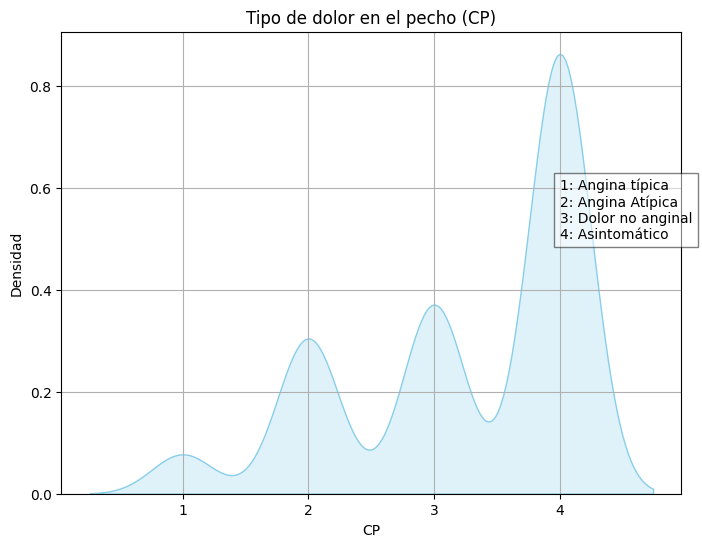

In [17]:
# Crear el gráfico de densidad de la variable CP

plt.figure(figsize=(8, 6))
sns.kdeplot(df['cp'], shade=True, color='skyblue')
plt.title('Tipo de dolor en el pecho (CP)')
plt.xlabel('CP')
plt.ylabel('Densidad')
plt.grid(True)

plt.text(4, 0.5, "1: Angina típica\n2: Angina Atípica\n3: Dolor no anginal\n4: Asintomático", fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

A través del gráfico de densidad, podemos observar que el tipo de dolor en el pecho más frecuente es el 4, "asintomático", seguido por el tipo de dolor no anginal y la angina atípica.

### TRESTBPS

---

Esta variable corresponde a la presión arterial en reposo. A continuación, obtenemos los valores:

In [18]:
# Obtener la distribución de valores de la variable "trestbps" y ordenar por edad ascendente
reparto_trestbps = df['trestbps'].value_counts().sort_index()

# Imprimir el reparto de valores ordenado por edad ascendente
print(reparto_trestbps)

trestbps
0         1
100       5
100.0     9
102.0     2
104       2
         ..
94.0      2
95        3
96        1
98.0      1
?        47
Name: count, Length: 95, dtype: int64


Al no tener valores decimales, los pasaremos a números enteros y además, los ordenaremos de manera ascendente.

Podemos observar que existe 1 valor '0', lo cual no tiene sentido en nuestro dataset y lo eliminaremos.

In [19]:
# Eliminar los decimales de la columna 'trestbps'
df['trestbps'] = df['trestbps'].astype(str).str.split('.').str[0]

# Obtener la distribución de valores y ordenarla por trestbps ascendente
reparto_trestbps = df['trestbps'].value_counts().sort_index()

# Imprimir el reparto de valores ordenado por trestbps ascendente
print(reparto_trestbps)

trestbps
0        1
100     14
102      2
104      3
105      7
106      2
108      6
110     44
112     12
113      1
114      2
115     14
116      2
117      1
118      9
120    109
122     11
123      1
124     11
125     24
126      6
127      1
128     15
130     88
132     10
134      9
135     17
136      7
138      9
140     78
142      7
144      3
145     11
146      3
148      2
150     42
152      4
154      2
155      6
158      2
160     41
164      1
165      2
170     12
172      2
174      1
178      3
180     11
185      1
190      2
192      1
200      2
92       1
94       2
95       3
96       1
98       1
?       47
Name: count, dtype: int64


Podemos observar que existen 47 valores desconocidos, por lo que debemos de saber la distribución del resto de valores para poder tomar una decisión respecto a los desconocidos.

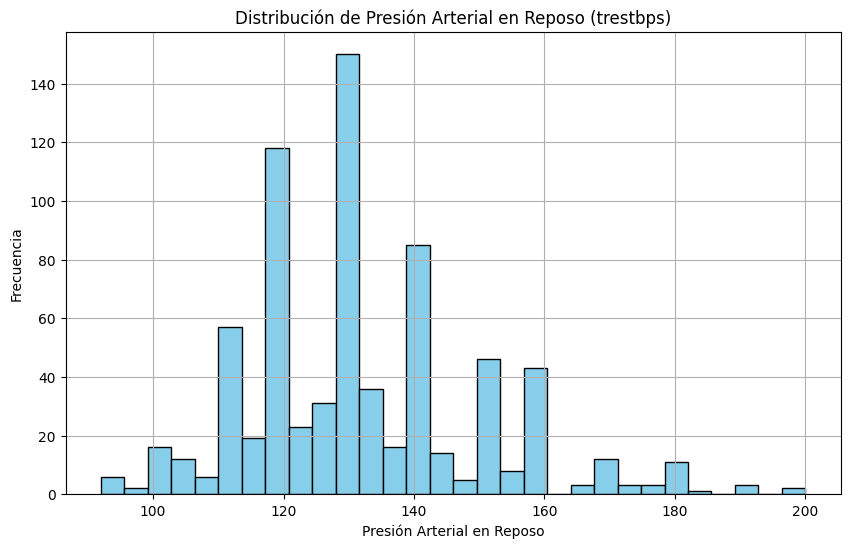

In [25]:
# Filtrar los valores '?' de la variable 'trestbps'
trestbps_filtrado = df[df['trestbps'] != '?']['trestbps'].astype(float)

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(trestbps_filtrado, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Presión Arterial en Reposo (trestbps)')
plt.xlabel('Presión Arterial en Reposo')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

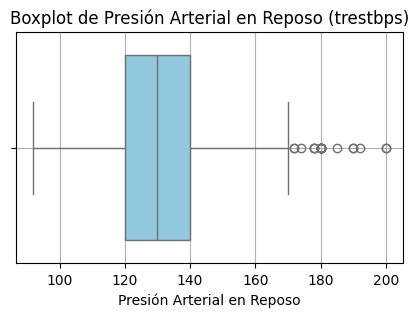

In [28]:
# Filtrar los valores '?' de la variable 'trestbps' y convertir a tipo numérico
trestbps_filtrado = df[df['trestbps'] != '?']['trestbps'].astype(float)

# Crear el boxplot
plt.figure(figsize=(5, 3))
sns.boxplot(x=trestbps_filtrado, color='skyblue')
plt.title('Boxplot de Presión Arterial en Reposo (trestbps)')
plt.xlabel('Presión Arterial en Reposo')
plt.grid(True)
plt.show()

Teniendo en cuenta el histograma y el gráfico de boxplot podemos observar que la mediana de la variable 'trestbps' es 130 y que la mayoría de los valores están entre 120 y 140. También en la última gráfica podemos observar valores atípicos fuera de los bigotes. Por último, obtendremos la media de la variable para tomar una decisión sobre los valores desconocidos.

In [24]:
# Filtrar los valores diferentes de '?' en la columna 'trestbps'
df_filtered = df[df['trestbps'] != '?']

# Convertir la columna 'trestbps' a tipo entero
df_filtered['trestbps'] = df_filtered['trestbps'].astype(int)

# Calcular la media de los valores en la columna 'trestbps'
media_trestbps = df_filtered['trestbps'].mean()

# Imprimir la media
print("Media de trestbps", media_trestbps)

Media de trestbps 132.02872777017785


Teniendo en cuenta que la media es 132 y la mediana de la variable es 130, tomaremos la decisión de sustituir los 47 valores desconocidos por el valor de la mediana.

In [22]:
# Reemplazar los valores '?' por 130 en la columna 'trestbps'
df['trestbps'].replace('?', 130, inplace=True)

# Convertir la columna 'trestbps' a tipo numérico
df['trestbps'] = pd.to_numeric(df['trestbps'])

# Obtener la distribución de valores y ordenarla por 'trestbps' ascendente
reparto_trestbps = df['trestbps'].value_counts().sort_index()

# Imprimir el reparto de valores ordenado por 'trestbps' ascendente
print(reparto_trestbps)


trestbps
92       1
94       2
95       3
96       1
98       1
100     14
102      2
104      3
105      7
106      2
108      6
110     44
112     12
113      1
114      2
115     14
116      2
117      1
118      9
120    109
122     11
123      1
124     11
125     24
126      6
127      1
128     15
130    135
132     10
134      9
135     17
136      7
138      9
140     78
142      7
144      3
145     11
146      3
148      2
150     42
152      4
154      2
155      6
158      2
160     41
164      1
165      2
170     12
172      2
174      1
178      3
180     11
185      1
190      2
192      1
200      2
Name: count, dtype: int64


### CHOL

---

In [31]:
# Obtener la distribución de valores de la variable 'chol'
distribucion_chol = df['chol'].value_counts().sort_index()

# Imprimir la distribución de valores de 'chol'
print(distribucion_chol)

chol
-9      16
0      134
100      2
117      1
126      1
      ... 
529      1
564      1
603      1
85       1
?        5
Name: count, Length: 205, dtype: int64


De la misma manera, al no existir rango decimal lo convertimos a enteros. Tampoco encontramos ningún outlier.

In [30]:
# Convertir los valores numéricos de la columna 'chol' a cadenas y eliminar los decimales
df['chol'] = df['chol'].astype(str).str.split('.').str[0]

# Imprimir la distribución de valores de 'chol'
distribucion_chol = df['chol'].value_counts(dropna=False).sort_index()
print(distribucion_chol)


chol
-9      16
0      134
100      2
117      1
126      1
      ... 
529      1
564      1
603      1
85       1
?        5
Name: count, Length: 205, dtype: int64


En este caso, eliminaremos los datos negativos y desconocidos para analizar la distribución de la variable y poder tomar la decisión más correcta.

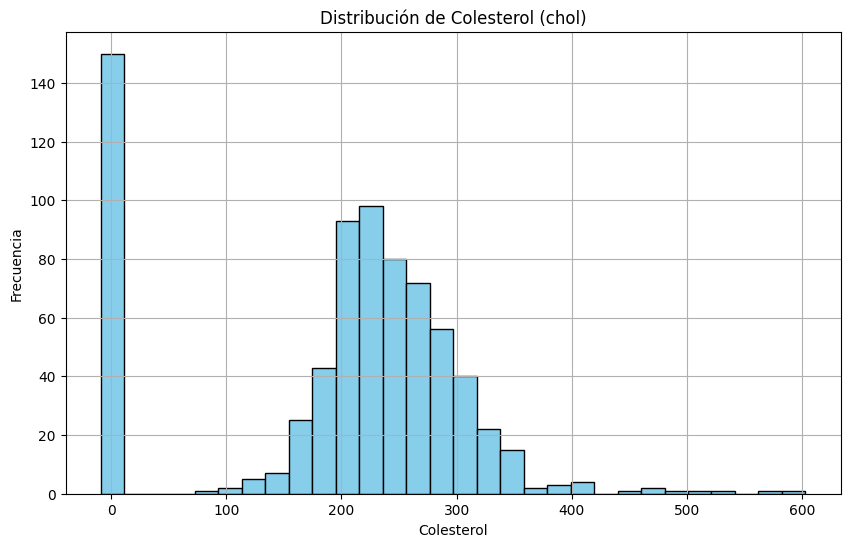

In [32]:
# Filtrar los valores negativos y '?' de la variable 'chol'
chol_filtrado = df[(df['chol'] != '-') & (df['chol'] != '?')]['chol'].astype(int)

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(chol_filtrado, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Colesterol (chol)')
plt.xlabel('Colesterol')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Podemos observar que una gran frecuencia de valores corresponden a 0. Al tratarse de una variable como el colesterol, lo consideramos un valor correcto.


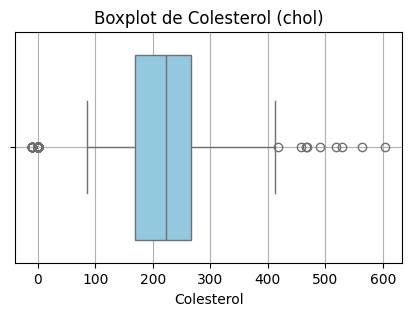

In [35]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=chol_filtrado, color='skyblue')
plt.title('Boxplot de Colesterol (chol)')
plt.xlabel('Colesterol')
plt.grid(True)
plt.show()

In [ ]:
# Filtrar los valores diferentes de '?' y '-9' en la columna 'chol'
valid_chol = df[(df['chol'] != '?') & (df['chol'] != '-9')]['chol']

# Convertir los valores válidos a numéricos
valid_chol = pd.to_numeric(valid_chol)

# Calcular la media y la moda de los valores válidos
media_chol = valid_chol.mean()
moda_chol = valid_chol.mode()[0]

# Imprimir la media y la moda de 'chol'
print("Media de chol (sin incluir ? y -9):", media_chol)
print("Moda de chol (sin incluir ? y -9):", moda_chol)


Media de chol (sin incluir ? y -9): 195.85714285714286
Moda de chol (sin incluir ? y -9): 0


En este caso la media no es lo más óptimo, ya que lo común como vemos en la moda es no tener colesterol en sangre, por lo que sustituiremos los valores por la moda.

In [ ]:
# Reemplazar los valores '?' por 0 en la columna 'chol'
df['chol'].replace('?', 0, inplace=True)

# Reemplazar los valores '-9' por 0 en la columna 'chol'
df['chol'].replace('-9', 0, inplace=True)

# Convertir la columna 'chol' a tipo numérico
df['chol'] = pd.to_numeric(df['chol'], errors='coerce')

# Imprimir la distribución actualizada de valores de 'chol'
distribucion_chol = df['chol'].value_counts(dropna=False).sort_index()
print(distribucion_chol)


chol
0      45
149     1
156     1
160     1
164     1
       ..
369     1
392     1
393     1
394     2
407     1
Name: count, Length: 97, dtype: int64


### FBS

---

Corresponde al dolor provocado por el esfuerzo. Corresponde a 1 si existe dolor y 0 si no existe.


In [67]:
# Obtener la distribución de valores de la variable 'fbs'
distribucion_fbs = df['fbs'].value_counts().sort_index()

# Imprimir la distribución de valores de 'fbs'
print(distribucion_fbs)


fbs
Sin dolor    731
Name: count, dtype: int64


Lo pasamos a entero al no haber flotantes.

In [66]:
# Eliminar los decimales de la columna 'fbs'
df['fbs'] = df['fbs'].astype(str).str.split('.').str[0]

# Obtener la distribución de valores de la variable 'fbs'
distribucion_fbs = df['fbs'].value_counts().sort_index()

# Imprimir la distribución de valores de 'fbs'
print(distribucion_fbs)


fbs
Sin dolor    731
Name: count, dtype: int64


ValueError: 'label' must be of length 'x'

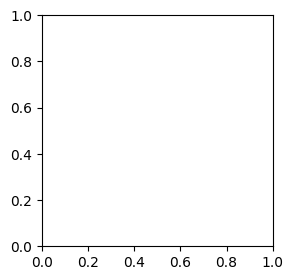

In [65]:
# Definir los colores pastel
azul_pastel = '#AED6F1'  # Azul pastel
amarillo_pastel = '#F9E79F'  # Amarillo pastel

# Crear una lista con los colores
paleta_fbs = [azul_pastel, amarillo_pastel]

# Convertir los valores enteros a cadenas y luego reemplazarlos
df['fbs'] = df['fbs'].astype(str).replace({'0': 'Sin dolor', '1': 'Con dolor'})

# Filtrar los valores negativos y '?' de la variable 'fbs'
fbs_filtrado = df[(df['fbs'] != '-9') & (df['fbs'] != '?')]['fbs']

# Calcular los porcentajes
porcentajes_fbs = 100 * fbs_filtrado.value_counts() / len(fbs_filtrado)

# Crear el gráfico de quesos
plt.figure(figsize=(3, 3))
pie = plt.pie(porcentajes_fbs, labels=['', ''], autopct='%1.1f%%', startangle=140, colors=paleta_fbs)

plt.title('Dolor provocado por el esfuerzo (FBS)')
plt.axis('equal')  # Asegura que el gráfico sea un círculo
plt.legend(pie[0], porcentajes_fbs.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


Teniendo en cuenta que el 83,2% de los pacientes no experimentan dolor por esfuerzo, sustituiremos los valores anómalos por la moda.

In [60]:
# Reemplazar los valores '-9' y '?' por '0' en la columna 'fbs'
df['fbs'].replace(['-9', '?'], '0', inplace=True)

# Convertir la columna 'fbs' a tipo entero
df['fbs'] = df['fbs'].astype(int)

# Obtener la distribución de valores de la variable 'fbs'
distribucion_fbs = df['fbs'].value_counts().sort_index()

# Imprimir la distribución de valores de 'fbs'
print(distribucion_fbs)


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

### RESTECG

---

Continuamos con la variable restecg, la cual nos indica los resultados electrocardiográficos en reposo.

In [ ]:
# Obtener la distribución de valores de la variable 'restecg'
distribucion_restecg = df['restecg'].value_counts()

# Imprimir la distribución de valores de 'restecg'
print(distribucion_restecg)


restecg
0.0     77
0       33
2.0     29
1       25
2       10
1.0      8
-9.0     1
?        1
Name: count, dtype: int64


Vemos que la disposición de esta variable es correcta, simplemente la pasamos a entero como de costumbre.

In [ ]:
#PARA TRAIN

# Convertir la columna 'restecg' a tipo entero
df['restecg'] = df['restecg'].astype(int)

# Obtener la distribución de valores de la variable 'restecg'
distribucion_restecg = df['restecg'].value_counts().sort_index()

# Imprimir la distribución de valores de 'restecg'
print(distribucion_restecg)


restecg
0    438
1    145
2    148
Name: count, dtype: int64


In [ ]:
#PARA TEST
# Eliminar los decimales de la columna 'restecg'
df['restecg'] = df['restecg'].astype(str).str.split('.').str[0]

# Obtener la distribución de valores de la variable 'restecg'
distribucion_restecg = df['restecg'].value_counts(dropna=False).sort_index()

# Imprimir la distribución de valores de 'restecg'
print(distribucion_restecg)


restecg
-9      1
0     110
1      33
2      39
?       1
Name: count, dtype: int64


Continuamos con thalach, que representa la frecuencia cardiaca en reposo.

In [ ]:
# Obtener la distribución de valores de la variable 'thalach' y ordenarla de menor a mayor
distribucion_thalach = df['thalach'].value_counts().sort_index()

# Imprimir la distribución de valores de 'thalach' ordenada de menor a mayor
print(distribucion_thalach)


thalach
-9.0      1
100.0     1
105       3
108       2
108.0     1
         ..
98        1
98.0      1
99        1
99.0      1
?        10
Name: count, Length: 106, dtype: int64


De manera habitual, al no haber decimales los descartamos.

In [ ]:
# Eliminar los decimales de la columna 'thalach'
df['thalach'] = df['thalach'].astype(str).str.split('.').str[0]

# Obtener la distribución de valores de la variable 'thalach' y ordenarla de menor a mayor
distribucion_thalach = df['thalach'].value_counts().sort_index()

# Imprimir la distribución de valores de 'thalach' ordenada de menor a mayor
print(distribucion_thalach)


thalach
-9      1
100     1
105     3
108     3
110     6
       ..
96      1
97      1
98      2
99      2
?      10
Name: count, Length: 83, dtype: int64


Aquí vemos que la distribución es bastante diversa, y tenemos que 44 registros no están asignados, por lo que debemos darles un valor.

Para ello, veremos a qué tienden los valores.

In [ ]:
import numpy as np

# Filtrar los valores diferentes de '?' en la columna 'thalach'
df_filtered = df[df['thalach'] != '?']

# Convertir la columna 'thalach' a tipo numérico
df_filtered['thalach'] = pd.to_numeric(df_filtered['thalach'])

# Calcular la media de los valores en la columna 'thalach'
media_thalach = df_filtered['thalach'].mean()

# Calcular la moda de los valores en la columna 'thalach'
moda_thalach = df_filtered['thalach'].mode()[0]

# Imprimir la media y la moda de 'thalach'
print("Media de thalach:", media_thalach)
print("Moda de thalach:", moda_thalach)


Media de thalach: 134.32183908045977
Moda de thalach: 130


<ipython-input-72-f0eece54ca33>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['thalach'] = pd.to_numeric(df_filtered['thalach'])


Vemos que deja bastante evidente que tanto la media como la moda tienden a que lo más común en estas enfermedades es tener una frecuencia cardiaca en reposo entorno a 140, por lo que otorgaremos este valor a los registros desconocidos.

In [ ]:
# Reemplazar los valores '?' por '140' en la columna 'thalach'
df['thalach'].replace('?', '140', inplace=True)

# Mostrar la distribución de valores de la variable 'thalach'
distribucion_thalach = df['thalach'].value_counts().sort_index()
print(distribucion_thalach)


thalach
-9     1
100    1
105    3
108    3
110    6
      ..
94     1
96     1
97     1
98     2
99     2
Name: count, Length: 82, dtype: int64


Continuamos con exang, que representa con 1 si existe angina inducida por ejercicio, o 0 en caso contrario

In [ ]:
# Mostrar la distribución de valores de la variable 'exang'
distribucion_exang = df['exang'].value_counts()
print(distribucion_exang)


exang
0.0     79
1       35
1.0     35
0       24
?       10
-9.0     1
Name: count, dtype: int64


Lo primero como siempre, descartamos decimales al no haber flotantes.

Al haber una clara tendencia hacia una no presencia de angina, asignaremos 0 a los registros con ?.

In [ ]:
# Convertir la columna 'exang' a tipo entero
df['exang'] = df['exang'].replace('?', np.nan).astype(float).fillna(0).astype(int)

# Obtener la distribución de valores de la variable 'exang' y ordenarla de menor a mayor
distribucion_exang = df['exang'].value_counts().sort_index()

# Imprimir la distribución de valores de 'exang' ordenada de menor a mayor
print(distribucion_exang)


exang
-9      1
 0    113
 1     70
Name: count, dtype: int64


Continuamos con oldpeak, que representa la depresión del ST inducida por el ejercicio en relación con el reposo.

In [ ]:
# Obtener la distribución de valores de la variable 'oldpeak' y ordenarla de menor a mayor
distribucion_oldpeak = df['oldpeak'].value_counts().sort_index()

# Imprimir la distribución de valores de 'oldpeak' ordenada de menor a mayor
print(distribucion_oldpeak)


oldpeak
-.1     1
-.7     1
.1      1
.2      1
.4      1
.5      1
.7      2
0      18
0.0    54
0.1     1
0.2     3
0.4     1
0.5     1
0.6     3
0.8     4
1       4
1.0    14
1.1     1
1.2     6
1.3     1
1.4     3
1.5    13
1.6     2
1.8     2
1.9     1
2       8
2.0     8
2.4     1
2.5     3
2.8     2
3       3
3.0     2
3.6     2
4.0     2
?      13
Name: count, dtype: int64


Aquí vemos que sí hay decimales, por lo que no interesa descartarlos, y vemos que su distribución es más compleja, por lo que vamos a ver a qué tiende.

In [ ]:
# Filtrar los valores diferentes de '?' en la columna 'oldpeak'
valid_oldpeak = df[df['oldpeak'] != '?']['oldpeak']

# Convertir los valores válidos a numéricos
valid_oldpeak = pd.to_numeric(valid_oldpeak, errors='coerce')

# Calcular la media y la moda de los valores válidos
media_oldpeak = valid_oldpeak.mean()
moda_oldpeak = valid_oldpeak.mode()[0]

# Imprimir la media y la moda de 'oldpeak'
print("Media de oldpeak (sin incluir ?):", media_oldpeak)
print("Moda de oldpeak (sin incluir ?):", moda_oldpeak)


Media de oldpeak (sin incluir ?): 0.8543859649122807
Moda de oldpeak (sin incluir ?): 0.0


Vemos que existen valores negativos que no tienen por qué ser anómalos, por lo que de momento no los vamos a descartar. Vemos que tanto la media como la moda tienden a que el denominador más común suele ser 0, por lo que los 49 registros desconocidos los evaluaremos a 0.

In [ ]:

# Reemplazar los valores '?' por 0 en la columna 'oldpeak'
df['oldpeak'].replace('?', 0, inplace=True)

# Convertir los valores de la columna 'oldpeak' a tipo numérico, ignorando los valores no válidos ('?')
df['oldpeak'] = pd.to_numeric(df['oldpeak'], errors='coerce')

# Imprimir la distribución actualizada de valores de 'oldpeak'
distribucion_oldpeak = df['oldpeak'].value_counts().sort_index()
print(distribucion_oldpeak)


oldpeak
-0.7     1
-0.1     1
 0.0    85
 0.1     2
 0.2     4
 0.4     2
 0.5     2
 0.6     3
 0.7     2
 0.8     4
 1.0    18
 1.1     1
 1.2     6
 1.3     1
 1.4     3
 1.5    13
 1.6     2
 1.8     2
 1.9     1
 2.0    16
 2.4     1
 2.5     3
 2.8     2
 3.0     5
 3.6     2
 4.0     2
Name: count, dtype: int64


Continuamos con slope, que representa la pendiente del segmento ST en ejercicio máximo, que solo puede tomar los valores 1, 2 y 3 (pendiente ascendente, plano y descendente respectivamente)

In [ ]:
# Mostrar la distribución de valores de la variable 'slope'
distribucion_slope = df['slope'].value_counts().sort_index()
print(distribucion_slope)


slope
-9.0    37
1       11
1.0     33
2       23
2.0     44
3       11
3.0      1
?       24
Name: count, dtype: int64


Aquí sí que lo primero es eliminar los decimales al no haber flotantes.

In [ ]:
# Convertir la columna 'slope' a tipo string y eliminar decimales
df['slope'] = df['slope'].astype(str).str.split('.').str[0]

# Mostrar la distribución de valores de la variable 'slope'
distribucion_slope = df['slope'].value_counts().sort_index()
print(distribucion_slope)


slope
-9    37
1     44
2     67
3     12
?     24
Name: count, dtype: int64


Aquí al no conocer el alcance exacto de la variable ni la importancia, y al haber una gran cantidad de registros desconocidos que no podemos descartar al ser muy elevado, procedemos a cambiarlos por la moda, que parece a priori que tiene una tendencia plana.

In [ ]:
# Reemplazar los valores '?' por 1 en la columna 'slope'
df['slope'].replace('?', '1', inplace=True)

# Reemplazar los valores -9 por 1 en la columna 'slope'
df['slope'].replace('-9', '1', inplace=True)

# Convertir la columna 'slope' a tipo entero
df['slope'] = df['slope'].astype(int)

# Mostrar la distribución actualizada de valores de la variable 'slope'
distribucion_slope = df['slope'].value_counts().sort_index()
print(distribucion_slope)


slope
1    105
2     67
3     12
Name: count, dtype: int64


Pasamos a la variable ca, que corresponde con el número de vasos mayores (0-3) coloreados por flouroscopia.

In [ ]:
# Mostrar la distribución de valores de la variable 'ca'
distribucion_ca = df['ca'].value_counts().sort_index()
print(distribucion_ca)


ca
-9.0    59
0.0     33
1        1
1.0     12
2        1
2.0      5
3.0      3
9.0      1
?       69
Name: count, dtype: int64


En primer lugar, como siempre, descartamos decimales al no existir flotantes.

In [ ]:
# Descartar los decimales en la distribución de valores de la variable 'ca'
df['ca'] = df['ca'].astype(str).str.split('.').str[0]

# Mostrar la distribución actualizada de valores de la variable 'ca'
distribucion_ca = df['ca'].value_counts().sort_index()
print(distribucion_ca)


ca
-9    59
0     33
1     13
2      6
3      3
9      1
?     69
Name: count, dtype: int64


Vemos que a priori no va a resultar una variable muy directa en el aprendizaje de la enfermedad, ya que hay más valores desconocidos que conocidos, por lo que simplemente los sustituiremos por la moda, que es el 0.

In [ ]:
# Reemplazar los valores '?' por '0' en la columna 'ca'
df['ca'].replace('?', '0', inplace=True)

# Reemplazar los valores '-9' por '0' en la columna 'ca'
df['ca'].replace('-9', '0', inplace=True)

# Mostrar la distribución actualizada de valores de la variable 'ca'
distribucion_ca = df['ca'].value_counts().sort_index()
print(distribucion_ca)


ca
0    161
1     13
2      6
3      3
9      1
Name: count, dtype: int64


Para finalizar la limpieza, analizaremos la variable thal, que representa con los valores 3, 6 y 7 los valores normal, defecto fijo y defecto reversible respectivamente.

In [ ]:
# Mostrar la distribución de valores de la variable 'thal'
distribucion_thal = df['thal'].value_counts().sort_index()
print(distribucion_thal)


thal
-9.0    55
3        3
3.0     36
6        4
6.0      5
7       14
7.0     18
?       49
Name: count, dtype: int64


Descartamos decimales de la manera habitual.

In [ ]:
# Descartar los decimales en la distribución de valores de la variable 'thal'
df['thal'] = df['thal'].astype(str).str.split('.').str[0]

# Mostrar la distribución actualizada de valores de la variable 'thal'
distribucion_thal = df['thal'].value_counts().sort_index()
print(distribucion_thal)


thal
-9    55
3     39
6      9
7     32
?     49
Name: count, dtype: int64


Aquí, de manera similar a la varible ca estudiada previamente, al existir multitud de registros desconocidos y no sacar una tendencia clara, decidimos otorgar a los desconocidos un thal normal, de cara a alterar el algoritmo lo menos posible.

In [ ]:
# Reemplazar los valores '?' por '3' en la columna 'thal'
df['thal'].replace('?', '3', inplace=True)

# Reemplazar los valores '-9' por '3' en la columna 'thal'
df['thal'].replace('-9', '3', inplace=True)

# Mostrar la distribución actualizada de valores de la variable 'thal'
distribucion_thal = df['thal'].value_counts().sort_index()
print(distribucion_thal)


thal
3    143
6      9
7     32
Name: count, dtype: int64


Con esto daríamos por finalizada la primera limpieza del dataset de entrenamiento, por lo que podemos proceder a descargarlo.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       184 non-null    int64  
 1   sex       184 non-null    int64  
 2   cp        184 non-null    int64  
 3   trestbps  184 non-null    int64  
 4   chol      184 non-null    int64  
 5   fbs       184 non-null    int64  
 6   restecg   184 non-null    object 
 7   thalach   184 non-null    object 
 8   exang     184 non-null    int64  
 9   oldpeak   184 non-null    float64
 10  slope     184 non-null    int64  
 11  ca        184 non-null    object 
 12  thal      184 non-null    object 
dtypes: float64(1), int64(8), object(4)
memory usage: 18.8+ KB


In [ ]:
from google.colab import files

# Guardar el DataFrame modificado como un nuevo archivo CSV
df.to_csv('train_cleaned.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('train_cleaned.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Una vez limpio el dataset de train, realizamos la limpieza sobre el dataset de test, y vemos los resultados.

In [ ]:
ruta = "/content/test.csv"
df = pd.read_csv(ruta)

In [ ]:
from google.colab import files

# Guardar el DataFrame modificado como un nuevo archivo CSV
df.to_csv('test_cleaned.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('test_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Observamos que algunos campos no se han limpiado correctamente debido a la diferencia de valores con el dataset de test, por el que añadimos manualmente las mismas lógicas que para el dataset de train.

# 2. Primera aproximación

En esta primera aproximación, vamos a generar un primer modelo de prueba kNN sobre el dataset de train y aplicarlo sobre el de test, generando un primer csv estimando las enfermedades de cada uno de los pacientes.

In [ ]:
ruta = "/content/train_cleaned.csv"
df_train = pd.read_csv(ruta, sep=';')

FileNotFoundError: [Errno 2] No such file or directory: '/content/train_cleaned.csv'

In [ ]:
ruta = "/content/test_cleaned.csv"
# Lee el archivo CSV especificando el separador como punto y coma
df_test = pd.read_csv(ruta, sep=';')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       731 non-null    int64  
 1   sex       731 non-null    int64  
 2   cp        731 non-null    int64  
 3   trestbps  731 non-null    int64  
 4   chol      731 non-null    int64  
 5   fbs       731 non-null    int64  
 6   restecg   731 non-null    int64  
 7   thalach   731 non-null    int64  
 8   exang     731 non-null    int64  
 9   oldpeak   731 non-null    float64
 10  slope     731 non-null    int64  
 11  ca        731 non-null    int64  
 12  thal      731 non-null    int64  
 13  label     731 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 80.1 KB


In [ ]:
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125,213,0,2,125,1,1.4,1,1,3,0
1,54,1,3,120,237,0,0,150,1,1.5,1,0,7,2
2,63,1,4,140,0,0,2,149,0,2.0,1,0,3,2
3,52,0,2,140,0,0,0,140,0,0.0,1,0,3,0
4,55,1,4,140,217,0,0,111,1,5.6,3,0,7,3


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       184 non-null    int64  
 1   sex       184 non-null    int64  
 2   cp        184 non-null    int64  
 3   trestbps  184 non-null    int64  
 4   chol      184 non-null    int64  
 5   fbs       184 non-null    int64  
 6   restecg   184 non-null    int64  
 7   thalach   184 non-null    int64  
 8   exang     184 non-null    int64  
 9   oldpeak   184 non-null    float64
 10  slope     184 non-null    int64  
 11  ca        184 non-null    int64  
 12  thal      184 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 18.8 KB


In [ ]:
df_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57,1,4,156,173,0,2,119,1,3.0,3,0,3
1,52,1,2,160,196,0,0,165,0,0.0,1,0,3
2,48,1,2,100,0,0,0,100,0,0.0,1,0,3
3,62,1,4,115,0,0,0,128,1,2.5,3,0,3
4,51,1,3,110,175,0,0,123,0,0.6,1,0,3


En esta primera aproximación ya con el dataset limpio, aplicaremos un modelo básico de regresión logística.

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Dividir los datos en características (X) y etiquetas (y) para entrenamiento y prueba
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']
X_test = df_test  # No eliminamos la columna 'ID' del conjunto de datos de prueba

# Inicializar el modelo de Regresión Logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el dataset de prueba
predictions = model.predict(X_test)

# Crear una columna de ID secuencial para identificar cada registro en el dataset de prueba
df_test['ID'] = range(len(df_test))

# Crear un DataFrame con las columnas 'ID' y 'label' predichas
predicted_labels_df = pd.DataFrame({'ID': df_test['ID'], 'label': predictions})


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Descargamos el fichero a entregar y comprobamos la primera predicción.

In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_2.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Esta primera predicción nos otorga un calidad 0.50543, lo que es una aproximación bastante decente en esta primer modelo, por lo que continuamos en la búsqueda de una mayor aproximación.

A continuación vamos a realizar un modelo con Random Forest, uno de los modelos más óptimos de predicción.

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Dividir los datos en características (X) y etiquetas (y) para entrenamiento y prueba
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

# Inicializar el modelo de Bosques Aleatorios
model = RandomForestClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el dataset de prueba
predictions = model.predict(df_test)

# Crear un DataFrame con las columnas 'ID' y 'label' predichas
predicted_labels_df = pd.DataFrame({'ID': range(len(df_test)), 'label': predictions})


In [ ]:
predicted_labels_df.head()

,ID,label
0,0,2
1,1,0
2,2,0
3,3,1
4,4,0


In [ ]:
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125,213,0,2,125,1,1.4,1,1,3,0
1,54,1,3,120,237,0,0,150,1,1.5,1,0,7,2
2,63,1,4,140,0,0,2,149,0,2.0,1,0,3,2
3,52,0,2,140,0,0,0,140,0,0.0,1,0,3,0
4,55,1,4,140,217,0,0,111,1,5.6,3,0,7,3


In [ ]:
df_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57,1,4,156,173,0,2,119,1,3.0,3,0,3
1,52,1,2,160,196,0,0,165,0,0.0,1,0,3
2,48,1,2,100,0,0,0,100,0,0.0,1,0,3
3,62,1,4,115,0,0,0,128,1,2.5,3,0,3
4,51,1,3,110,175,0,0,123,0,0.6,1,0,3


In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_3.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tras esto obtenemos una aproximación de 0.58695, lo que supone una mejora notable de la predicción.

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Dividir los datos en características (X) y etiquetas (y) para entrenamiento y prueba
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

# Inicializar el modelo KNN
model = KNeighborsClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el dataset de prueba
predictions = model.predict(df_test)

# Crear un DataFrame con las columnas 'ID' y 'label' predichas
predicted_labels_df = pd.DataFrame({'ID': range(len(df_test)), 'label': predictions})


In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_9.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_9.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_excel('prediccion_9.xlsx', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_9.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Dividir los datos en características (X) y etiquetas (y) para entrenamiento y prueba
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

# Inicializar el modelo de Árbol de Decisión
model = DecisionTreeClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el dataset de prueba
predictions = model.predict(df_test)

# Crear un DataFrame con las columnas 'ID' y 'label' predichas
predicted_labels_df = pd.DataFrame({'ID': range(len(df_test)), 'label': predictions})


In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_10.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_10.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Dividir los datos en características (X) y etiquetas (y) para entrenamiento y prueba
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

# Inicializar el modelo de árbol de decisión como estimador base
base_estimator = DecisionTreeClassifier()

# Inicializar el ensemble Bagging con árboles de decisión como estimadores base
model = BaggingClassifier(base_estimator=base_estimator)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el dataset de prueba
predictions = model.predict(df_test)

# Crear un DataFrame con las columnas 'ID' y 'label' predichas
predicted_labels_df = pd.DataFrame({'ID': range(len(df_test)), 'label': predictions})


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_11.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_11.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_excel('prediccion_11.xlsx', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_11.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier

# Dividir los datos en características (X) y etiquetas (y) para entrenamiento y prueba
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

# Inicializar el modelo de Gradient Boosting
model = GradientBoostingClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el dataset de prueba
predictions = model.predict(df_test)

# Crear un DataFrame con las columnas 'ID' y 'label' predichas
predicted_labels_df = pd.DataFrame({'ID': range(len(df_test)), 'label': predictions})


In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_12.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_12.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_excel('prediccion_12.xlsx', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_12.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 3. Normalizacion

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Definir las columnas a normalizar
columns_to_normalize = ['trestbps', 'chol', 'thalach', 'oldpeak']

# Crear un MinMaxScaler
scaler = MinMaxScaler()

# Normalizar las características seleccionadas
df_train[columns_to_normalize] = scaler.fit_transform(df_train[columns_to_normalize])
df_test[columns_to_normalize] = scaler.transform(df_test[columns_to_normalize])


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Definir las columnas a normalizar
columns_to_normalize = ['trestbps', 'chol', 'thalach', 'oldpeak']

# Crear un MinMaxScaler
scaler = MinMaxScaler()

# Normalizar las características seleccionadas en el conjunto de entrenamiento
df_train[columns_to_normalize] = scaler.fit_transform(df_train[columns_to_normalize])

# Aplicar la misma transformación al conjunto de prueba
df_test[columns_to_normalize] = scaler.transform(df_test[columns_to_normalize])


In [ ]:
# Mapear los valores de 'thal' a 1, 2 y 3
mapping = {3: 1, 6: 2, 7: 3}

# Reemplazar los valores en el conjunto de entrenamiento
df_train['thal'] = df_train['thal'].replace(mapping)

# Reemplazar los valores en el conjunto de prueba
df_test['thal'] = df_test['thal'].replace(mapping)


In [ ]:
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,0.305556,0.353234,0,2,0.457746,1,0.454545,1,1,1,0
1,54,1,3,0.259259,0.393035,0,0,0.633803,1,0.465909,1,0,3,2
2,63,1,4,0.444444,0.000000,0,2,0.626761,0,0.522727,1,0,1,2
3,52,0,2,0.444444,0.000000,0,0,0.563380,0,0.295455,1,0,1,0
4,55,1,4,0.444444,0.359867,0,0,0.359155,1,0.931818,3,0,3,3


In [ ]:
df_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57,1,4,0.592593,0.286899,0,2,0.415493,1,0.636364,3,0,1
1,52,1,2,0.629630,0.325041,0,0,0.739437,0,0.295455,1,0,1
2,48,1,2,0.074074,0.000000,0,0,0.281690,0,0.295455,1,0,1
3,62,1,4,0.212963,0.000000,0,0,0.478873,1,0.579545,3,0,1
4,51,1,3,0.166667,0.290216,0,0,0.443662,0,0.363636,1,0,1


In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
df_train.to_csv('train_normalized.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('train_normalized.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
df_test.to_csv('test_normalized.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('test_normalized.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 4. Modelos normalizados

In [ ]:
ruta = "/content/train_normalized.csv"
# Lee el archivo CSV especificando el separador como punto y coma
df_train = pd.read_csv(ruta, sep=';')

In [ ]:
ruta = "/content/test_normalized.csv"
# Lee el archivo CSV especificando el separador como punto y coma
df_test = pd.read_csv(ruta, sep=';')

In [ ]:
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,0.305556,0.353234,0,2,0.457746,1,0.454545,1,1,1,0
1,54,1,3,0.259259,0.393035,0,0,0.633803,1,0.465909,1,0,3,2
2,63,1,4,0.444444,0.000000,0,2,0.626761,0,0.522727,1,0,1,2
3,52,0,2,0.444444,0.000000,0,0,0.563380,0,0.295455,1,0,1,0
4,55,1,4,0.444444,0.359867,0,0,0.359155,1,0.931818,3,0,3,3


In [ ]:
df_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57,1,4,0.592593,0.286899,0,2,0.415493,1,0.636364,3,0,1
1,52,1,2,0.629630,0.325041,0,0,0.739437,0,0.295455,1,0,1
2,48,1,2,0.074074,0.000000,0,0,0.281690,0,0.295455,1,0,1
3,62,1,4,0.212963,0.000000,0,0,0.478873,1,0.579545,3,0,1
4,51,1,3,0.166667,0.290216,0,0,0.443662,0,0.363636,1,0,1


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Dividir los datos en características (X) y etiquetas (y) para entrenamiento y prueba
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

# Inicializar el modelo de Bosques Aleatorios
model = RandomForestClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el dataset de prueba
predictions = model.predict(df_test)

# Crear un DataFrame con las columnas 'ID' y 'label' predichas
predicted_labels_df = pd.DataFrame({'ID': range(len(df_test)), 'label': predictions})


In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_13.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_13.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_excel('prediccion_13.xlsx', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_13.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Dividir los datos en características (X) y etiquetas (y)
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

# Inicializar el modelo de Random Forest
model = RandomForestClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importance = model.feature_importances_

# Definir un umbral de importancia
threshold = 0.03  # Por ejemplo, establecer el umbral en 0.05

# Seleccionar las características con una importancia mayor que el umbral
selected_features = X_train.columns[feature_importance > threshold]

# Crear un nuevo conjunto de datos de entrenamiento solo con las características seleccionadas
X_train_selected = X_train[selected_features]

# Realizar predicciones en el dataset de prueba
predictions = model.predict(df_test)

# Crear un DataFrame con las columnas 'ID' y 'label' predichas
predicted_labels_df = pd.DataFrame({'ID': range(len(df_test)), 'label': predictions})


Explicar variación del umbral, con 0.03 record de kaggle

In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_14.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_14.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Inicializar el modelo Gradient Boosting
model = GradientBoostingClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importance = model.feature_importances_

# Definir un umbral de importancia
threshold = 0.05  # Por ejemplo, establecer el umbral en 0.05

# Seleccionar las características con una importancia mayor que el umbral
selected_features = X_train.columns[feature_importance > threshold]

# Crear un nuevo conjunto de datos de entrenamiento solo con las características seleccionadas
X_train_selected = X_train[selected_features]

# Realizar predicciones en el dataset de prueba
predictions = model.predict(df_test)

# Crear un DataFrame con las columnas 'ID' y 'label' predichas
predicted_labels_df = pd.DataFrame({'ID': range(len(df_test)), 'label': predictions})


In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_16.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_16.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Dividir el conjunto de datos de entrenamiento en características (X_train) y etiquetas (y_train)
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

# Dividir el conjunto de datos de prueba en características (X_test)
X_test = df_test

# Normalizar las características usando StandardScaler
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Inicializar el modelo SVM
model = SVC(kernel='rbf', C=0.1, random_state=42)

# Entrenar el modelo SVM con el conjunto de entrenamiento normalizado
model.fit(X_train_normalized, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test_normalized)

# Crear un DataFrame con las columnas 'ID' y 'label' predichas
predicted_labels_df = pd.DataFrame({'ID': range(len(df_test)), 'label': predictions})


In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_17.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_17.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 5. SELECCIÓN DE CARACTERÍSTICAS

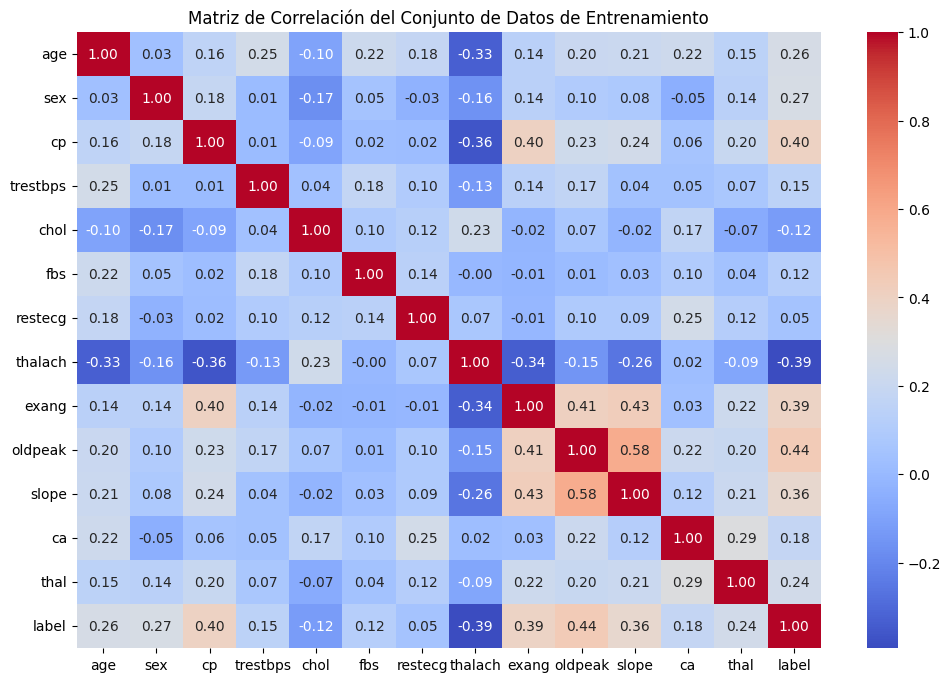

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = df_train.corr()

# Visualizar la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación del Conjunto de Datos de Entrenamiento')
plt.show()


# 6. OPTIMIZACIÓN DE RANDOM FOREST

In [ ]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir los hiperparámetros para la búsqueda aleatoria
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Inicializar el modelo de Random Forest
rf_model = RandomForestClassifier()

# Realizar la búsqueda aleatoria
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Ejecutar la búsqueda aleatoria para encontrar los mejores hiperparámetros
random_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = random_search.best_params_

# Crear un nuevo modelo con los mejores hiperparámetros
best_rf_model = RandomForestClassifier(**best_params)

# Entrenar el modelo con los mejores hiperparámetros
best_rf_model.fit(X_train, y_train)

# Realizar predicciones en el dataset de prueba
predictions = best_rf_model.predict(X_test)

# Crear un DataFrame con las columnas 'ID' y 'label' predichas
predicted_labels_df = pd.DataFrame({'ID': range(len(X_test)), 'label': predictions})


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_18.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_18.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

No mejora


# 7. Creación de nuevas características

In [ ]:
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,0.305556,0.353234,0,2,0.457746,1,0.454545,1,1,1,0
1,54,1,3,0.259259,0.393035,0,0,0.633803,1,0.465909,1,0,3,2
2,63,1,4,0.444444,0.000000,0,2,0.626761,0,0.522727,1,0,1,2
3,52,0,2,0.444444,0.000000,0,0,0.563380,0,0.295455,1,0,1,0
4,55,1,4,0.444444,0.359867,0,0,0.359155,1,0.931818,3,0,3,3


In [ ]:
# Mostrar información del conjunto de datos de entrenamiento
print(df_train.info())

# Mostrar estadísticas descriptivas de las características numéricas
print(df_train.describe())

# Visualizar la distribución de la variable objetivo
print(df_train['label'].value_counts())

# Visualizar la correlación entre las características y la variable objetivo
print(df_train.corr()['label'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       731 non-null    int64  
 1   sex       731 non-null    int64  
 2   cp        731 non-null    int64  
 3   trestbps  731 non-null    float64
 4   chol      731 non-null    float64
 5   fbs       731 non-null    int64  
 6   restecg   731 non-null    int64  
 7   thalach   731 non-null    float64
 8   exang     731 non-null    int64  
 9   oldpeak   731 non-null    float64
 10  slope     731 non-null    int64  
 11  ca        731 non-null    int64  
 12  thal      731 non-null    int64  
 13  label     731 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.1 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean    53.362517    0.789330    3.250342    0.37063